# 21기 Clustering 정규세션 과제

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [14]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

고객의 연령, 연 수입, 소비점수에 따라 유형화할 수 있음 => 해당 변수들을 군집화에 활용

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [16]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'] # 군집화 대상 컬럼명 리스트
data = df[columns]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = columns)

data

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [17]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=data['Age'],
    y=data['Annual Income (k$)'],
    z=data['Spending Score (1-100)'],
    mode='markers',
    marker=dict(color='blue', size=5),
))

fig.update_layout(scene=dict(
                    xaxis_title='Age',
                    yaxis_title='Annual Income (k$)',
                    zaxis_title='Spending Score (1-100)'),
                  margin=dict(l=0, r=0, b=0, t=0))

fig.show()


''' Annual Income과 Spending Score를 토대로 그래프를 그릴 때 군집 형태가 시각화됨을 알 수 있음 '''

' Annual Income과 Spending Score를 토대로 그래프를 그릴 때 군집 형태가 시각화됨을 알 수 있음 '

'2차원 산점도를 통해 시각화한 결과, 군집의 형태가 뚜렷하게 나타남'

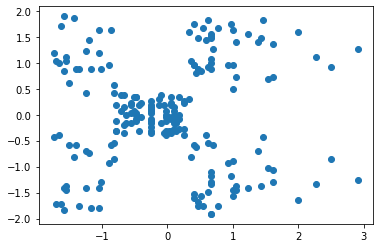

In [18]:
plt.scatter(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'])

'''2차원 산점도를 통해 시각화한 결과, 군집의 형태가 뚜렷하게 나타남'''

In [19]:
data.drop('Age', axis=1, inplace=True)

'''클러스터링에 불필요한 변수인 나이 제거'''

'클러스터링에 불필요한 변수인 나이 제거'

## 2. Clustering

### 1) K-means

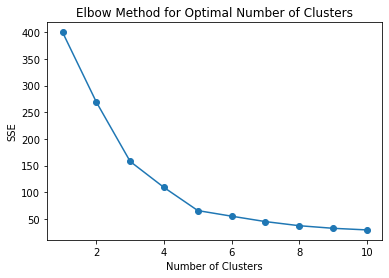

'K-Means 알고리즘의 적정 군집 수를 결정하기 위해 elbow method 활용 ==> 5개가 적당한 것으로 보임'

In [20]:
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')

# SSE 값을 저장할 리스트 초기화
sse = []

# 다양한 클러스터 개수에 대해 K-means 알고리즘 수행 및 SSE 계산
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# SSE 값 그래프로 그리기
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()



'''K-Means 알고리즘의 적정 군집 수를 결정하기 위해 elbow method 활용 ==> 5개가 적당한 것으로 보임'''

In [21]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])

kmeans_cluster = kmeans.predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])
data['kmeans'] = kmeans_cluster

'''5개의 군집으로 클러스터링한 결과를 kmeans 열에 저장'''

'5개의 군집으로 클러스터링한 결과를 kmeans 열에 저장'

### 2) Agglomerative Clustering

In [22]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5)

agg_cluster = agg.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])
data['Agglomerative'] = agg_cluster


'''동일하게 5개의 군집으로 클러스터링하되, 병합 군집 방식을 사용하여 라벨링한 결과를 Agglomerative 열에 저장'''

'동일하게 5개의 군집으로 클러스터링하되, 병합 군집 방식을 사용하여 라벨링한 결과를 Agglomerative 열에 저장'

In [23]:
data

'''클러스터링 결과가 각각의 열에 알맞게 저장되었음을 알 수 있음'''

'클러스터링 결과가 각각의 열에 알맞게 저장되었음을 알 수 있음'

## 3. Evaluation

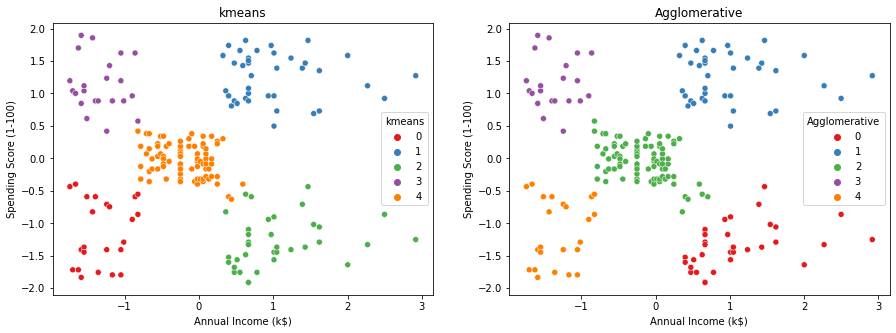

'\nK-means 방식과 Agglomerative clustering 방식으로 군집화한 데이터를 각각 시각화 \n\n두 방식의 결과가 조금 다름을 알 수 있음\n'

In [26]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

for i, method in enumerate(['kmeans', 'Agglomerative']):
    sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue=method, palette='Set1', ax=axs[i])
    axs[i].set_title(method)

plt.show()


'''
K-means 방식과 Agglomerative clustering 방식으로 군집화한 데이터를 각각 시각화 

두 방식의 결과가 조금 다름을 알 수 있음
'''

In [25]:
from sklearn.metrics import silhouette_score, pairwise_distances
from itertools import combinations
from sys import maxsize


# 평가 함수 (실루엣 점수 및 dunn index 값 출력)
def evaluate(data, method):
    X = data[[x for x in data.columns if x != method]]
    cluster = data[method]
    silhouette_avg = silhouette_score(X, cluster) # silhouette_score 함수 활용

    dunn_index = min(single_linkage_distance(data, method)) / max(complete_diameter_distance(data, method)) # 클러스터 간 최소 거리 / 클러스터 내 최대 거리

    print(f'Silhouette Score of {method}: {silhouette_avg}')
    print(f'Dunn Index of {method}: {dunn_index}')

# 클러스터 내 최대 거리들이 담긴 리스트를 생성하는 함수
def complete_diameter_distance(data, method):
    data = data[['Annual Income (k$)', 'Spending Score (1-100)']+[method]]

    indices = {}

    for cluster_num, group in data.groupby(method):
        indices[cluster_num] = group.index

    distances = pd.DataFrame(pairwise_distances(data[['Annual Income (k$)', 'Spending Score (1-100)']]))

    cdd = []

    for cluster_num in indices.keys():
        cdd.append(np.max(distances.iloc[indices[cluster_num], indices[cluster_num]]).max()) # 각 클러스터마다 내부 최대 거리 계산 (클러스터 내 가장 먼 두 점 간의 거리)

    return cdd # 클러스터 내 최대 거리들이 담긴 리스트
    
# 클러스터 간 최소 거리들이 담긴 리스트를 생성하는 함수
def single_linkage_distance(data, method):
    data = data[['Annual Income (k$)', 'Spending Score (1-100)']+[method]]

    indices = {}

    for cluster_num, group in data.groupby(method):
        indices[cluster_num] = group.index

    cluster_combinations = combinations(data[method].unique(), 2)
    distances = pd.DataFrame(pairwise_distances(data[['Annual Income (k$)', 'Spending Score (1-100)']]))
    for i in range(min(distances.shape)):
        distances.values[i, i] = maxsize # 대각행렬에는 sys.maxsize를 배치하여 최솟값 탐색에 영향을 주지 않도록 함

    sld = []

    for c1, c2 in cluster_combinations: # 각 클러스터 조합마다 최소 거리 계산 (가장 가까운 점들간의 거리)
        c1_index = indices[c1]
        c2_index = indices[c2]
        
        sld.append(np.min(distances.iloc[c1_index, c2_index]).min())

    return sld # 클러스터 간 최소 거리들이 담긴 리스트
        

print('클러스터링 성능평가 지표')
evaluate(data, 'kmeans')
print('\n')
evaluate(data, 'Agglomerative')

클러스터링 성능평가 지표
Silhouette Score of kmeans: 0.6424085442346887
Dunn Index of kmeans: 0.0594047780383811


Silhouette Score of Agglomerative: 0.6721462188134268
Dunn Index of Agglomerative: 0.09029561169415495


## Dunn Index 수치가 지나치게 작게 나온 것은 데이터 분포 상 클러스터 간의 거리가 매우 작게 나타날 수밖에 없어서임 ==> centroid 간의 거리를 구하는 등의 방법을 사용하면 스케일을 키울 수 있을 듯함.

## 전반적으로 병합 분할 방식을 사용했을 때 성능이 조금 더 좋게 도출됨을 알 수 있음.